# Importing Libraries

In [349]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Activation, Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import model_selection
import os
import h5py

In [6]:
# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.12.0


# PART A

## Q1. Data import and Understanding

### A. Read the ‘Signals.csv’ as DataFrame

In [55]:
PATH =  "/Users/kashmkj/Documents/Learning Resources/GreatLearning/Intro to DL:NN/Projects"

# Checking filename
os.listdir(PATH)

In [57]:
df_signals = pd.read_csv(PATH + "/Part-+1%2C2%263+-+Signal.csv")

In [60]:
df_signals.head(10)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [70]:
df_signals.shape

(1599, 12)

### B. Check for missing values and print percentage for each attribute

In [63]:
df_signals.isnull().sum()*100/len(df_signals)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

### C. Check for presence of duplicate records in the dataset and impute with appropriate method

In [67]:
df_signals[df_signals.duplicated() == True]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


- Hence, there are 240 duplicate records

In [72]:
df_signals.drop_duplicates(inplace=True)

In [73]:
df_signals.shape

(1359, 12)

### D. Visualise distribution of the target variable

In [85]:
# Checking number of Unique values of Signal_Strength
df_signals['Signal_Strength'].value_counts()

Signal_Strength
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

- We can consider Signal_Strength as a categorical attribute. Although, we can experiment as regression too, but for the project, we will assume there are 6 classes of Signal_Strength

In [88]:
df_signals.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

In [79]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

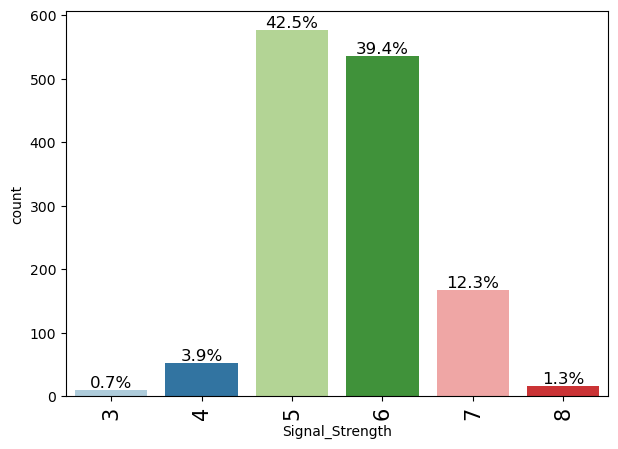

In [84]:
labeled_barplot(df_signals, "Signal_Strength",perc=True)

### E. Share insights from the initial data analysis

1. Signal_Strength "5" covers the majority of the data with 42.5% values & "6" with 39.4% values
2. Signal_Strength "3" has the least values with 0.7% only
3. To create a robust model, oversampling like SMOTE is required to balance the data

## Q2. Data preprocessing

### A. Split the data into X & Y

In [91]:
## Separating Independent and Dependent Columns
X = df_signals.drop(['Signal_Strength'],axis=1)
Y = df_signals[['Signal_Strength']]

In [92]:
Y.head()

,Signal_Strength
0,5
1,5
2,5
3,6
5,5


### B. Split the data into train & test with 70:30 proportion

In [94]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42,stratify = Y)

### C. Print shape of all the 4 variables and verify if train and test data is in sync

In [99]:
print("Shape of X_train = {}".format(X_train.shape))
print("Shape of X_test = {}".format(X_test.shape))
print("Shape of y_train = {}".format(y_train.shape))
print("Shape of y_test = {}".format(y_test.shape))

Shape of X_train = (951, 11)
Shape of X_test = (408, 11)
Shape of y_train = (951, 1)
Shape of y_test = (408, 1)


- Hence, rows of X_test is 30% of total data and X_train is 70% of total dataset

### D. Normalise the train and test data with appropriate method

In [101]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### E. Transform Labels into format acceptable by Neural Network

In [114]:
y_train.nunique()

Signal_Strength    6
dtype: int64

In [115]:
y_train.value_counts()

Signal_Strength
5                  404
6                  374
7                  117
4                   37
8                   12
3                    7
Name: count, dtype: int64

- Hence, there are 6 catgories with values [5,6,7,4,8,3] . We will convert these from 0 to 5, and then perform OHE

In [132]:
# Convert to "one-hot" vectors using the to_categorical function

num_classes=6
y_train_cat = to_categorical(y_train-3,num_classes=num_classes)
y_test_cat = to_categorical(y_test-3, num_classes=num_classes)

In [136]:
y_train[:5]-3, y_train_cat[:5]

(     Signal_Strength
 849                2
 777                3
 431                2
 77                 3
 330                3,
 array([[0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.]], dtype=float32))

## Q3. Model Training & Evaluation using Neural Network

In [139]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### A. Design a Neural Network to train a classifier

In [141]:
X_train_scaled.shape

(951, 11)

#### Model 1

In [159]:
model = Sequential()
model.add(Dense(activation = 'relu', input_dim = 11, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(num_classes, activation = 'sigmoid'))

In [160]:
# Compile model

adam = optimizers.legacy.Adam(learning_rate=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [161]:
## Looking into our base model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 6)                 198       
                                                                 
Total params: 3,046
Trainable params: 3,046
Non-trainable params: 0
_________________________________________________________________


In [162]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

### B. Train the classifier using previously designed Architecture

In [163]:
X_train_scaled.shape, y_train_cat.shape

((951, 11), (951, 6))

In [166]:
history=model.fit(X_train_scaled, y_train_cat, validation_split=0.2, epochs=50, batch_size=128, verbose=2,callbacks=callbacks)

Epoch 1/50

Epoch 1: saving model to model_weights.h5
6/6 - 0s - loss: 1.0778 - accuracy: 0.5684 - val_loss: 1.0548 - val_accuracy: 0.5812 - lr: 0.0010 - 101ms/epoch - 17ms/step
Epoch 2/50

Epoch 2: saving model to model_weights.h5
6/6 - 0s - loss: 1.0620 - accuracy: 0.5671 - val_loss: 1.0418 - val_accuracy: 0.5864 - lr: 0.0010 - 67ms/epoch - 11ms/step
Epoch 3/50

Epoch 3: saving model to model_weights.h5
6/6 - 0s - loss: 1.0482 - accuracy: 0.5658 - val_loss: 1.0309 - val_accuracy: 0.5916 - lr: 0.0010 - 60ms/epoch - 10ms/step
Epoch 4/50

Epoch 4: saving model to model_weights.h5
6/6 - 0s - loss: 1.0368 - accuracy: 0.5711 - val_loss: 1.0217 - val_accuracy: 0.5916 - lr: 0.0010 - 67ms/epoch - 11ms/step
Epoch 5/50

Epoch 5: saving model to model_weights.h5
6/6 - 0s - loss: 1.0252 - accuracy: 0.5750 - val_loss: 1.0147 - val_accuracy: 0.5969 - lr: 0.0010 - 58ms/epoch - 10ms/step
Epoch 6/50

Epoch 6: saving model to model_weights.h5
6/6 - 0s - loss: 1.0160 - accuracy: 0.5776 - val_loss: 1.009

### C. Plot 2 separate visuals

#### Training Loss and Validation Loss

13/13 [==============================] - 0s 7ms/step - loss: 1.0327 - accuracy: 0.5662


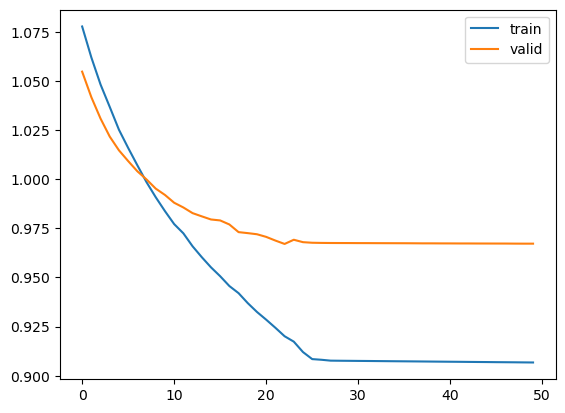

In [168]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test_scaled, y_test_cat)

#### Training Accuracy and Validation Accuracy

13/13 [==============================] - 0s 6ms/step - loss: 1.0327 - accuracy: 0.5662


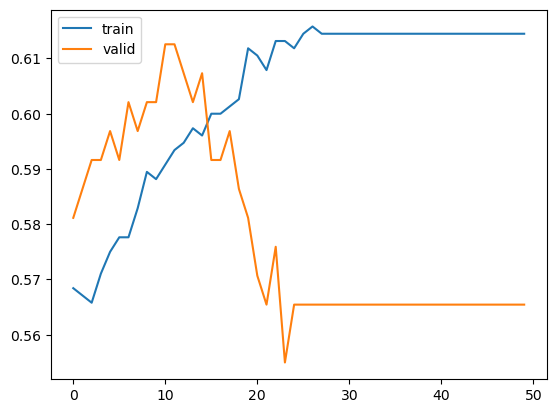

In [169]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test_scaled, y_test_cat)

### D. Design new architecture/update existing architecture in attempt to improve the performance of the model

In [170]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

##### Model 2 - Adding more layers and Dropout

In [173]:
model2 = Sequential()
model2.add(Dense(256,activation='relu',input_dim = X_train_scaled.shape[1]))
model2.add(Dropout(0.2))
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(num_classes, activation = 'softmax'))

In [174]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               3072      
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)               

In [175]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [176]:
history_2 = model2.fit(X_train_scaled,y_train_cat,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
12/12 [==============================] - 1s 30ms/step - loss: 1.5955 - accuracy: 0.3395 - val_loss: 1.3646 - val_accuracy: 0.5340
Epoch 2/50
12/12 [==============================] - 0s 12ms/step - loss: 1.2660 - accuracy: 0.5368 - val_loss: 1.0793 - val_accuracy: 0.5812
Epoch 3/50
12/12 [==============================] - 0s 11ms/step - loss: 1.1119 - accuracy: 0.5671 - val_loss: 1.0347 - val_accuracy: 0.5864
Epoch 4/50
12/12 [==============================] - 0s 10ms/step - loss: 1.0554 - accuracy: 0.5816 - val_loss: 1.0104 - val_accuracy: 0.5812
Epoch 5/50
12/12 [==============================] - 0s 10ms/step - loss: 1.0310 - accuracy: 0.5776 - val_loss: 1.0026 - val_accuracy: 0.5864
Epoch 6/50
12/12 [==============================] - 0s 11ms/step - loss: 1.0076 - accuracy: 0.5658 - val_loss: 0.9886 - val_accuracy: 0.5969
Epoch 7/50
12/12 [==============================] - 0s 11ms/step - loss: 0.9800 - accuracy: 0.6066 - val_loss: 0.9814 - val_accuracy: 0.6073
Epoch 8/50
12

#### Model 3 - Adding more layer and RandomisedSearch

In [223]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [224]:
def create_model_v3(lr,batch_size):  
    np.random.seed(1337)

    model3 = Sequential()
    model3.add(Dense(256,activation='relu',input_dim = X_train_scaled.shape[1], kernel_initializer='he_uniform'))
    model3.add(Dropout(0.1))
    model3.add(Dense(128,activation='relu', kernel_initializer='he_uniform'))
    model3.add(Dropout(0.1))
    model3.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
    model3.add(Dropout(0.1))
    model3.add(Dense(32,activation='relu', kernel_initializer='he_uniform'))
    model3.add(Dense(num_classes, activation = 'softmax'))
    
    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model3.compile(optimizer = optimizer,loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model3


- We are using Random search to optimize two hyperparameters - Batch size & Learning Rate.

In [225]:
keras_estimator = KerasClassifier(build_fn=create_model_v3, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random)


/var/folders/y3/sj4jd8d52hgf1dwssqb4kb580000gn/T/ipykernel_40108/2429848441.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_estimator = KerasClassifier(build_fn=create_model_v3, verbose=1)


In [226]:
random_result = random.fit(X_train_scaled, y_train_cat,validation_split=0.2,verbose=1) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits


10/10 [==============================] - 0s 25ms/step - loss: 1.1247 - accuracy: 0.5300


10/10 [==============================] - 0s 23ms/step - loss: 1.1968 - accuracy: 0.4795


10/10 [==============================] - 0s 22ms/step - loss: 1.2064 - accuracy: 0.5773


10/10 [==============================] - 0s 24ms/step - loss: 1.3968 - accuracy: 0.3849


10/10 [==============================] - 0s 25ms/step - loss: 1.3548 - accuracy: 0.3849


10/10 [==============================] - 0s 25ms/step - loss: 1.3218 - accuracy: 0.4132


10/10 [==============================] - 0s 22ms/step - loss: 1.1506 - accuracy: 0.5521


10/10 [==============================] - 0s 26ms/step - loss: 1.1560 - accuracy: 0.5521


10/10 [==============================] - 0s 23ms/step - loss: 1.0862 - accuracy: 0.5521


5/5 [==============================] - 0s 38ms/step - loss: 1.1937 - accuracy: 0.4953


5/5 [==============================] - 0s 34ms/step - loss: 1.1917 - accuracy: 0.5205


5/5 [==============================] - 0s 35ms/step - loss: 1.1720 - accuracy: 0.6088


5/5 [==============================] - 0s 31ms/step - loss: 1.4825 - accuracy: 0.4290


5/5 [==============================] - 0s 36ms/step - loss: 1.3599 - accuracy: 0.4921


5/5 [==============================] - 0s 40ms/step - loss: 1.5259 - accuracy: 0.4416


5/5 [==============================] - 0s 37ms/step - loss: 1.1905 - accuracy: 0.5237


5/5 [==============================] - 0s 38ms/step - loss: 1.6382 - accuracy: 0.3344


5/5 [==============================] - 0s 38ms/step - loss: 1.3298 - accuracy: 0.5016


3/3 [==============================] - 0s 40ms/step - loss: 1.2811 - accuracy: 0.5394


3/3 [==============================] - 0s 50ms/step - loss: 1.2592 - accuracy: 0.5426


3/3 [==============================] - 0s 56ms/step - loss: 1.2026 - accuracy: 0.5079


3/3 [==============================] - 0s 48ms/step - loss: 1.4872 - accuracy: 0.3407


3/3 [==============================] - 0s 52ms/step - loss: 1.3503 - accuracy: 0.4353


3/3 [==============================] - 0s 48ms/step - loss: 1.4792 - accuracy: 0.3975


3/3 [==============================] - 0s 44ms/step - loss: 1.3365 - accuracy: 0.3943


3/3 [==============================] - 0s 51ms/step - loss: 1.4640 - accuracy: 0.4953


3/3 [==============================] - 0s 51ms/step - loss: 1.4097 - accuracy: 0.4890


24/24 [==============================] - 2s 49ms/step - loss: 1.5959 - accuracy: 0.4066 - val_loss: 1.1261 - val_accuracy: 0.5654


In [227]:
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Best: 0.552050 using {'lr': 0.001, 'batch_size': 32}


In [228]:
estimator_v3=create_model_v3(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v3.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 256)               3072      
                                                                 
 dropout_84 (Dropout)        (None, 256)               0         
                                                                 
 dense_141 (Dense)           (None, 128)               32896     
                                                                 
 dropout_85 (Dropout)        (None, 128)               0         
                                                                 
 dense_142 (Dense)           (None, 64)                8256      
                                                                 
 dropout_86 (Dropout)        (None, 64)                0         
                                                                 
 dense_143 (Dense)           (None, 32)              

In [229]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v3.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_3=estimator_v3.fit(X_train_scaled, y_train_cat, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)


Epoch 1/50
12/12 [==============================] - 2s 82ms/step - loss: 1.4405 - accuracy: 0.4658 - val_loss: 1.1042 - val_accuracy: 0.5654
Epoch 2/50
12/12 [==============================] - 0s 36ms/step - loss: 1.1953 - accuracy: 0.5342 - val_loss: 1.0648 - val_accuracy: 0.5759
Epoch 3/50
12/12 [==============================] - 0s 22ms/step - loss: 1.0593 - accuracy: 0.5816 - val_loss: 1.0390 - val_accuracy: 0.5864
Epoch 4/50
12/12 [==============================] - 0s 21ms/step - loss: 1.0289 - accuracy: 0.5882 - val_loss: 1.0474 - val_accuracy: 0.5812
Epoch 5/50
12/12 [==============================] - 0s 18ms/step - loss: 0.9682 - accuracy: 0.6053 - val_loss: 1.0246 - val_accuracy: 0.5654
Epoch 6/50
12/12 [==============================] - 0s 19ms/step - loss: 0.9730 - accuracy: 0.5934 - val_loss: 1.0290 - val_accuracy: 0.5707
Epoch 7/50
12/12 [==============================] - 0s 22ms/step - loss: 0.9544 - accuracy: 0.6092 - val_loss: 1.0194 - val_accuracy: 0.5550
Epoch 8/50
12

### E. Plot visuals as in Q3.C and share insights about difference observed in both the models

- Hence observed, model 2 was better than model 3. Plotting model 2 visuals

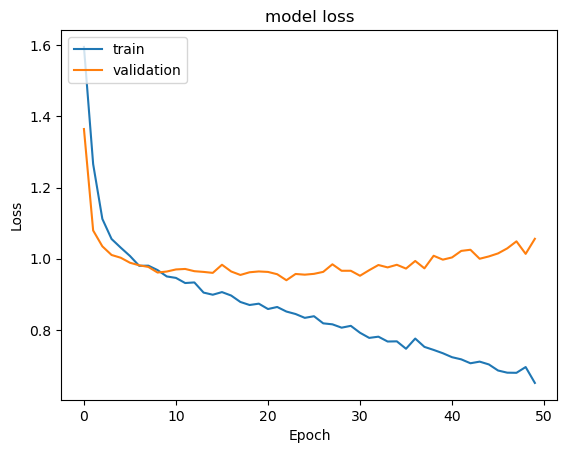

In [230]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

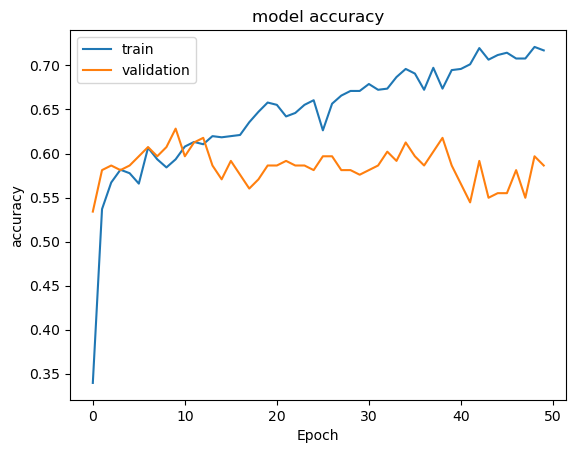

In [231]:
#Plotting Train accuracy vs Validation accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Insights

1. Model 1 was a base model, while model 2 was an improved model with validation accuracy 0.5864 increased.
2. Validation loss for Model 2 is better than validation loss for model 1.
3. We still see validation loss > Training loss, which means there is still overfitting happening in the data. Further to improve the accuracy and loss, we can try using SMOTE to balance the categorical data

# PART B

## Q1.  Data Import and Exploration

### A. Read the .h5 file and assign to a variable

In [232]:
PATH_2 =  "/Users/kashmkj/Documents/Learning Resources/GreatLearning/Intro to DL:NN/Projects"

# Checking filename
os.listdir(PATH_2)

['.DS_Store',
 'NN+-+Problem+-+Statement.pdf',
 'Autonomous_Vehicles_SVHN_single_grey1.h5',
 'NN-+Milestones.pdf',
 'Part-+1%2C2%263+-+Signal.csv']

In [235]:
hf = h5py.File(PATH_2 + '/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

### B. Print all the keys from the .h5 file

In [240]:
list(hf.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

### C. Split the data into X_train, X_test, Y_train, Y_test

In [247]:
X_train = hf['X_train'][:]
X_test = hf['X_test'][:]
Y_train = hf['y_train'][:]
Y_test = hf['y_test'][:]

## Q2.  Data Visualisation and preprocessing

### A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync

In [267]:
X_train.shape, X_test.shape

((42000, 32, 32), (18000, 32, 32))

In [268]:
Y_train.shape, Y_test.shape

((42000,), (18000,))

In [255]:
X = np.concatenate((X_train,X_test), axis=0)

Y = np.concatenate((Y_train, Y_test), axis=0)

In [257]:
X.shape, Y.shape

((60000, 32, 32), (60000,))

In [260]:
if X.shape[0]==Y.shape[0]:
    print("X & Y are in sync")
else:
    print("X & Y are not in sync")

X & Y are in sync


### B. Visualise first 10 images in train data and print its corresponding labels

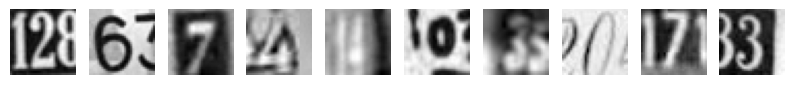

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [265]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (Y_train[0:10]))

### C. Reshape all the images with appropriate shape update the data in same variable

In [274]:
# (n, 32, 32) => (n, 1024)
image_vector_size = 32*32
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

### D. Normalise the images i.e. Normalise the pixel values

In [280]:
# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Training set', X_train.shape, Y_train.shape)
print('Test set', X_test.shape, Y_test.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


### E. Transform Labels into format acceptable by Neural Network

In [290]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [291]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
Y_train = to_categorical(Y_train, num_classes)
Y_test_cat=to_categorical(Y_test,num_classes)

In [293]:
print("First 10 training lables as one-hot encoded vectors:\n", Y_train[:10])

First 10 training lables as one-hot encoded vectors:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### F. Print total Number of classes in the Dataset

In [298]:
np.unique(Y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

- Hence, there are 10 labels/classes in the dataset

## Q3. Model Training & Evaluation using Neural Network

### A. Design a Neural Network to train a classifier
### B. Train the classifier using previously designed Architecture

I have developed 3 models, and used the final model with the most optimised and highest accuracy to plots visualisation and observations

#### Model - 1

In [303]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [304]:
image_size=32*32

model = Sequential()
model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,))) ###Multiple Dense units with Relu activation
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used 


In [305]:
# Compile model
#RMS_prop=optimizers.RMSprop()   ## we can similarly use different optimizers like RMSprop, Adagrad and SGD 
adam = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [306]:
## Looking into our base model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 285,418
Trainable params: 285,418
Non-trainable params: 0
_________________________________________________________________


In [307]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')
callbacks = [checkpoint,reduce_lr]

In [309]:
# Fit the model
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=2,callbacks=callbacks)

Epoch 1/10

Epoch 1: saving model to model_weights.h5
263/263 - 8s - loss: 2.3088 - accuracy: 0.1025 - val_loss: 2.2995 - val_accuracy: 0.1282 - lr: 0.0010 - 8s/epoch - 32ms/step
Epoch 2/10

Epoch 2: saving model to model_weights.h5
263/263 - 4s - loss: 2.1121 - accuracy: 0.2223 - val_loss: 1.9007 - val_accuracy: 0.3087 - lr: 0.0010 - 4s/epoch - 14ms/step
Epoch 3/10

Epoch 3: saving model to model_weights.h5
263/263 - 4s - loss: 1.7009 - accuracy: 0.3912 - val_loss: 1.5994 - val_accuracy: 0.4585 - lr: 0.0010 - 4s/epoch - 14ms/step
Epoch 4/10

Epoch 4: saving model to model_weights.h5
263/263 - 4s - loss: 1.4541 - accuracy: 0.5045 - val_loss: 1.3323 - val_accuracy: 0.5601 - lr: 0.0010 - 4s/epoch - 14ms/step
Epoch 5/10

Epoch 5: saving model to model_weights.h5
263/263 - 4s - loss: 1.2788 - accuracy: 0.5815 - val_loss: 1.1894 - val_accuracy: 0.6150 - lr: 0.0010 - 4s/epoch - 14ms/step
Epoch 6/10

Epoch 6: saving model to model_weights.h5
263/263 - 4s - loss: 1.1957 - accuracy: 0.6155 - va

#### Model - 2

In [310]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [315]:
image_size=32*32

model2 = Sequential()
model2.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,))) ###Multiple Dense units with Relu activation
model2.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model2.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used 

In [316]:
# Compile model
RMS_prop=optimizers.RMSprop()   ## we can similarly use different optimizers like RMSprop, Adagrad and SGD 
# adam = optimizers.Adam(lr=1e-3)
model2.compile(loss=losses.categorical_crossentropy, optimizer=RMS_prop, metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [317]:
## Looking into our base model
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               262400    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 305,962
Trainable params: 305,962
Non-trainable params: 0
_________________________________________________________________


In [318]:
history2 = model2.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=128, verbose=2,callbacks=callbacks)

Epoch 1/50

Epoch 1: saving model to model_weights.h5
263/263 - 8s - loss: 2.3090 - accuracy: 0.0994 - val_loss: 2.3028 - val_accuracy: 0.0974 - lr: 0.0010 - 8s/epoch - 32ms/step
Epoch 2/50

Epoch 2: saving model to model_weights.h5
263/263 - 4s - loss: 2.3041 - accuracy: 0.0999 - val_loss: 2.3028 - val_accuracy: 0.1014 - lr: 0.0010 - 4s/epoch - 16ms/step
Epoch 3/50

Epoch 3: saving model to model_weights.h5
263/263 - 4s - loss: 2.3038 - accuracy: 0.1009 - val_loss: 2.3028 - val_accuracy: 0.0974 - lr: 0.0010 - 4s/epoch - 15ms/step
Epoch 4/50

Epoch 4: saving model to model_weights.h5
263/263 - 4s - loss: 2.3022 - accuracy: 0.1029 - val_loss: 2.3015 - val_accuracy: 0.0992 - lr: 1.0000e-04 - 4s/epoch - 15ms/step
Epoch 5/50

Epoch 5: saving model to model_weights.h5
263/263 - 4s - loss: 2.2999 - accuracy: 0.1118 - val_loss: 2.2990 - val_accuracy: 0.1113 - lr: 1.0000e-04 - 4s/epoch - 15ms/step
Epoch 6/50

Epoch 6: saving model to model_weights.h5
263/263 - 4s - loss: 2.2963 - accuracy: 0.1

- Model with RMSProp and 50 epochs didn't perform better. Model-1 had 68% accuracy, whereas this model had 0.60% validation accuracy.

Let's try another model with dropout.

#### Model - 3

In [376]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [377]:
def adam_model_batch_normalisation(activation_func_hidden, activation_func_output, metrics, lr =0.001, loss = losses.categorical_crossentropy):
    model = Sequential()
    
    model.add(Dense(256, input_shape = (image_size, ), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation(activation_func_hidden))    
    model.add(Dense(128, kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation(activation_func_hidden))  
    model.add(Dense(64,kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation(activation_func_hidden))    
    model.add(Dense(32,kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation(activation_func_hidden))    
    model.add(Dense(10))
    model.add(Activation(activation_func_output))
    
    adam = optimizers.legacy.Adam(learning_rate = lr)
    model.compile(optimizer = adam, loss = loss, metrics = metrics)
    
    return model

In [378]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [379]:
model = adam_model_batch_normalisation('relu', 'softmax', ['accuracy'])
history_3 = model.fit(X_train, Y_train, validation_split=0.2, epochs = 10, verbose = 2, callbacks=callbacks)

Epoch 1/10

Epoch 1: saving model to model_weights.h5
1050/1050 - 24s - loss: 1.5392 - accuracy: 0.4928 - val_loss: 2.0323 - val_accuracy: 0.3599 - lr: 0.0010 - 24s/epoch - 23ms/step
Epoch 2/10

Epoch 2: saving model to model_weights.h5
1050/1050 - 19s - loss: 1.0941 - accuracy: 0.6482 - val_loss: 1.4336 - val_accuracy: 0.5288 - lr: 0.0010 - 19s/epoch - 18ms/step
Epoch 3/10

Epoch 3: saving model to model_weights.h5
1050/1050 - 19s - loss: 0.9675 - accuracy: 0.6931 - val_loss: 1.2725 - val_accuracy: 0.5743 - lr: 0.0010 - 19s/epoch - 18ms/step
Epoch 4/10

Epoch 4: saving model to model_weights.h5
1050/1050 - 19s - loss: 0.8868 - accuracy: 0.7181 - val_loss: 1.0187 - val_accuracy: 0.6783 - lr: 0.0010 - 19s/epoch - 18ms/step
Epoch 5/10

Epoch 5: saving model to model_weights.h5
1050/1050 - 18s - loss: 0.8186 - accuracy: 0.7379 - val_loss: 1.1731 - val_accuracy: 0.6249 - lr: 0.0010 - 18s/epoch - 17ms/step
Epoch 6/10

Epoch 6: saving model to model_weights.h5
1050/1050 - 18s - loss: 0.7695 

### C. Evaluate performance of the model with appropriate metrics

In [380]:
tf.debugging.disable_traceback_filtering()
results = model.evaluate(X_test, Y_test_cat)

print("Result for Test Set Accuracy = {}".format(results[1]))

563/563 [==============================] - 6s 11ms/step - loss: 0.6303 - accuracy: 0.8062
Result for Test Set Accuracy = 0.8062222599983215


In [381]:
Y_pred=model.predict(X_test)

# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
Y_pred_final=[]
for i in Y_pred:
    Y_pred_final.append(np.argmax(i))

563/563 [==============================] - 2s 3ms/step


In [382]:
print(classification_report(Y_test, Y_pred_final))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1814
           1       0.86      0.80      0.83      1828
           2       0.91      0.77      0.83      1803
           3       0.72      0.79      0.75      1719
           4       0.89      0.83      0.86      1812
           5       0.76      0.81      0.78      1768
           6       0.77      0.79      0.78      1832
           7       0.81      0.88      0.84      1808
           8       0.81      0.73      0.77      1812
           9       0.81      0.78      0.80      1804

    accuracy                           0.81     18000
   macro avg       0.81      0.81      0.81     18000
weighted avg       0.81      0.81      0.81     18000



- Hence, With Model 3, we got an test set accuracy for 81%.

### D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same

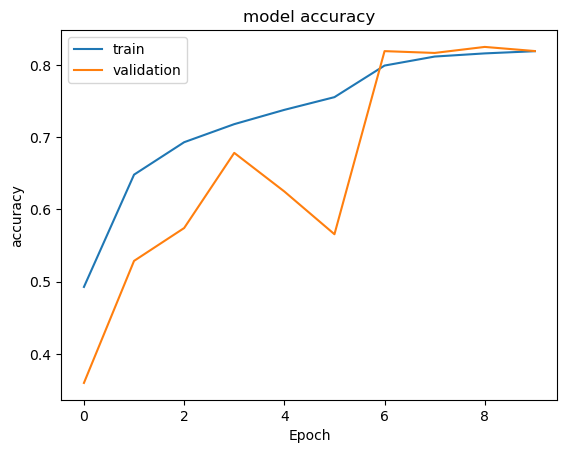

In [384]:
#Plotting Train accuracy vs Validation accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

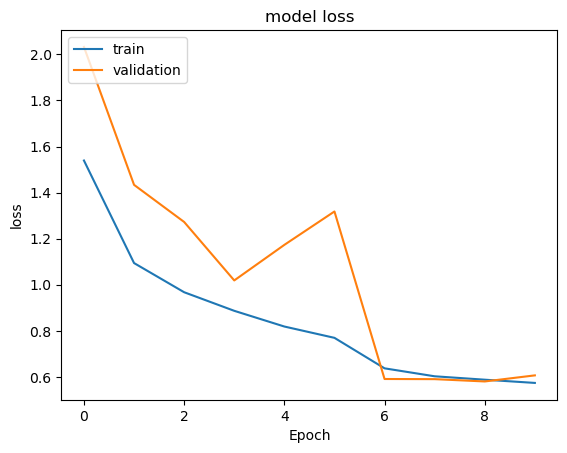

In [385]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Observations:
1. As observed above, with model-3 (which involves Adam optimiser, batchnormalisation, 5 layers), we got a test accuracy of 81%, with just 10 epochs. To put model on production, we can train on 50/100 epochs and get the accuracy to more by a minute amount.
2. Training loss and Validation loss, converges to neighbouting place. There's not much difference between the final training and validation loss.
3. The model's training accuracy and validation accuracy , test accuracy are very similar (~0.81) after 10 epochs. Hence, the model didn't overfit.

# The End